In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

In [2]:
# Create a quantum circuit with 3 qubits
toffoli_ = QuantumCircuit(3)

In [3]:
# Step 1: Initial Hadamard on target
toffoli_.h(2)

toffoli_.cx(1, 2)
toffoli_.tdg(2)
toffoli_.cx(0, 2)
toffoli_.t(2)
toffoli_.cx(1, 2)
toffoli_.tdg(2)
toffoli_.cx(0, 2)
toffoli_.tdg(1)
toffoli_.t(2)
toffoli_.h(2)
toffoli_.cx(0, 1)

toffoli_.tdg(1)
toffoli_.cx(0, 1)
toffoli_.s(1)
toffoli_.t(0)

print("Decomposed Toffoli Circuit:")
print(toffoli_)

Decomposed Toffoli Circuit:
                                                                  ┌───┐
q_0: ───────────────────■─────────────────────■────■───────────■──┤ T ├
                        │            ┌─────┐  │  ┌─┴─┐┌─────┐┌─┴─┐├───┤
q_1: ───────■───────────┼─────────■──┤ Tdg ├──┼──┤ X ├┤ Tdg ├┤ X ├┤ S ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐├─────┤┌─┴─┐├───┤└┬───┬┘└───┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├───────────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘           


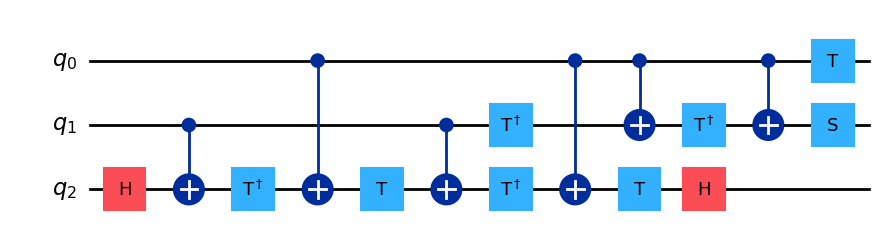

In [6]:
# To get a visual diagram of the circuit
toffoli_.draw('mpl')

In [7]:
# 1. Get the unitary operator for our decomposed circuit
decomposed_op = Operator(toffoli_)

# 2. Build the target circuit using Qiskit's native Toffoli gate
toffoli_native = QuantumCircuit(3)
toffoli_native.ccx(0, 1, 2)
native_op = Operator(toffoli_native)

# 3. Compare the two operators
# The equiv() method returns True if they are mathematically equivalent
are_equivalent = decomposed_op.equiv(native_op)

print(f"\n equivalent? {are_equivalent}")


 equivalent? True
